In [1]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np


l = 2 # average number of arrivals per minute
µ = 5 # average number of people served per minute
ncust = 2000 # number of customers


r_mean_tol = 20
r_mean_std = 3

b_mean_tol = 10
b_mean_std = 2


log = []
class Simulation:
    def __init__(self):
        self.num_in_system = 0

        self.t_arrival = self.generate_interarrival()
        self.balk_tol = self.generate_bal_tol()
        self.renge_tol = self.generate_ren_tol()

        self.t_reneg = self.t_arrival  + self.renge_tol
        self.t_depart = float('inf')
        self.clock = 0.0

        self.num_arrivals = 0
        self.num_departs = 0
        self.total_wait = 0.0
        self.num_balkers = 0
        self.num_renegs = 0
        self.num_in_system = 0

        # Lists to store data for plotting
        self.time_points = []
        self.wait_times = []
        self.num_in_systems = []


    def advance_time(self):
        t_event = min(self.t_arrival, self.t_depart) # next event is the smallest number between next arrival or departure
        self.total_wait += self.num_in_system*(t_event-self.clock)

        # Append data for plotting
        self.time_points.append(self.clock)
        self.wait_times.append(self.total_wait)
        self.num_in_systems.append(self.num_in_system)

        self.clock = t_event # update the clock

        if self.t_arrival <= self.t_depart: # if arrival happens first
            self.handle_arrival_event()
            text = "user", i, "arrived"
            log.append(text)
        else:
            self.handle_depart_event()
            text = "user", i, "departed"
            log.append(text)

        if self.renge_tol < self.total_wait : # if reneging tolerance is less than number in the system
            self.handle_depart_event()
            self.num_renegs += 1
            self.renge_tol = self.generate_ren_tol()
            text = "user", i, "left the Queue"
            log.append(text)


    def handle_arrival_event(self):
        self.num_in_system  += 1
        self.num_arrivals += 1

        if self.num_in_system <=1: # if arrival is the only one currenly in the system
            self.t_depart = self.clock + self.generate_service()
        if self.balk_tol < self.num_in_system : # if balking tolerance is less than number in the system
            self.handle_depart_event()
            self.balkers  += 1
            text = "user", i, "balked"
            log.append(text)

        self.t_arrival = self.clock +  self.generate_interarrival()   # next arrival  time
        self.bal_tol = self.generate_bal_tol() # generate next balk tolerance


    def handle_depart_event(self):
        self.num_in_system  -= 1
        self.num_departs += 1
        if self.num_in_system >0: # if this is not the last customer in the system
            self.t_depart = self.clock + self.generate_service()
        else:
            self.t_depart = float('inf')

    def generate_interarrival(self):
        return np.random.exponential(1/l)
    def generate_bal_tol(self):
        return round(np.random.normal(b_mean_tol, b_mean_std))
    def generate_ren_tol(self):
        return np.random.normal(r_mean_tol, r_mean_std)
    def generate_service(self):
        #return np.random.exponential(1/µ)
        return µ

np.random.seed(0)

s = Simulation()

for i in range(ncust):
    s.advance_time()

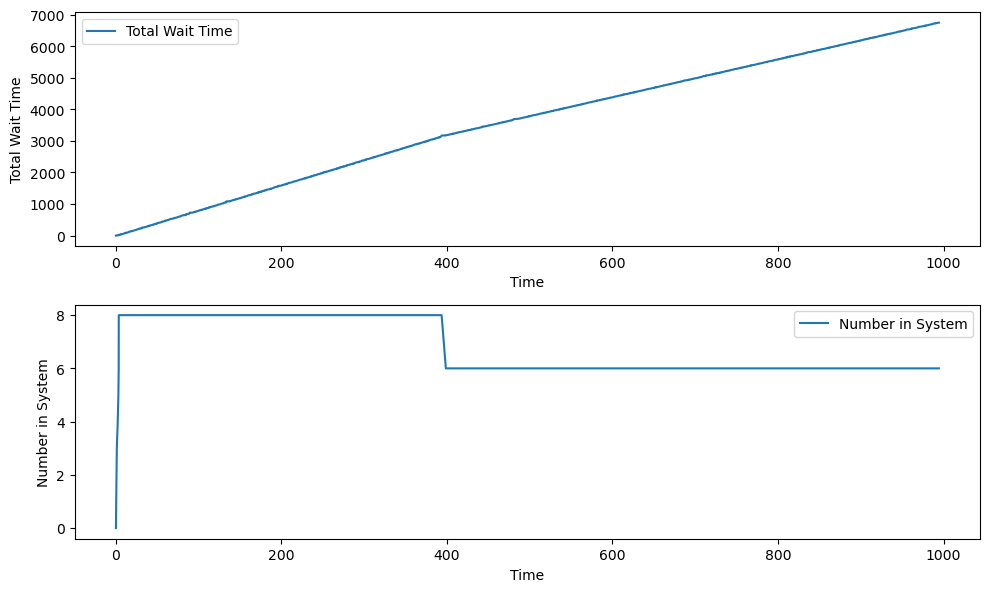

In [2]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot total_wait over time
plt.subplot(2, 1, 1)
plt.plot(s.time_points, s.wait_times, label='Total Wait Time')
plt.xlabel('Time')
plt.ylabel('Total Wait Time')
plt.legend()

# Plot num_in_system over time
plt.subplot(2, 1, 2)
plt.plot(s.time_points, s.num_in_systems, label='Number in System')
plt.xlabel('Time')
plt.ylabel('Number in System')
plt.legend()

plt.tight_layout()
plt.show()